# Intercomparison Campaigns - Reconstruct Graphics of Beelitz' Intercomparison Campaign 1958

**Contains modified Copernicus Climate Change Service Information 2020**
under [License](https://apps.ecmwf.int/datasets/licences/copernicus/)

*Copernicus Climate Change Service (C3S) - Upper Air Data Service (2020)*

The purpose of this IPython Notebook is to demonstrate the usability of data from intercomparison campaigns.

    Author: U. Voggenberger
    Date: 09.2020
    Contact: ulrich.voggenberger [at] univie.ac.at
    License: C3S, 2020

In [1]:
import pandas
import numpy as np
import datetime
import glob
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import cdsapi, zipfile, os, time, sys

# Please note: Server URL will be omitted, once published
c = cdsapi.Client(url='https://sis-dev.climate.copernicus.eu/api/v2')
from scipy.interpolate import interp1d
import warnings
warnings.filterwarnings("ignore")

In [2]:
fs = open('path.txt', 'r')
path = fs.read()  
fs.close()
sys.path.append(path)

import cds_eua3 as eua
eua.logging_set_level(30)

In [3]:
plt.rcParams['figure.figsize'] = (10,10)
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

---

In [4]:
# requesting and downloading the data:
t0 = time.time()
# Start Request
r = c.retrieve('insitu-comprehensive-upper-air-observation-network',
               {
                   'variable': ["air_temperature"],
                   # WILDCARD vor all COMP 04 files, if some statids are double, they get filtered:
                   'statid': ['0-20100-0-00401', '0-20100-0-004*'],
                   'optional': ['sonde_type',],
                   'format': 'csv'                   
               })

if True:
    # Start Download
    r.download(target='download.zip')
    # Check file size
    assert os.stat('download.zip').st_size == r.content_length, "Downloaded file is incomplete"
    # Unzip the Data Stream
    z = zipfile.ZipFile('download.zip')
    print("Unzipping retrieved files: to ./exampla_data/2")
    print(z.namelist())
    z.extractall(path='./example_data/2')
    z.close()
    os.remove('download.zip')
    print("Time elapsed: ", time.time()-t0, "s")

2020-10-05 08:06:57,035 INFO Welcome to the CDS
2020-10-05 08:06:57,036 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2020-10-05 08:06:57,419 INFO Request is completed
2020-10-05 08:06:57,420 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.comprehensive_upper_air.retrieve-1601636849.6005108-27158-26-e067ea53-8766-4d2f-ab91-991105f3c95f.zip to download.zip (185.9K)
2020-10-05 08:06:57,646 INFO Download rate 824.9K/s


Unzipping retrieved files: to ./exampla_data/2
['temperature.csv']
Time elapsed:  0.8488047122955322 s


In [5]:
data = pandas.read_csv('example_data/2/temperature.csv', index_col=0)
data.statid.drop_duplicates()

obs_id
0        0-20100-0-00404
1091     0-20100-0-00403
2121     0-20100-0-00402
3353     0-20100-0-00406
4664     0-20100-0-00401
5717     0-20100-0-00408
7299     0-20100-0-00409
8681     0-20100-0-00405
9528     0-20100-0-00407
10672    0-20100-0-00410
11813    0-20100-0-00411
12719    0-20100-0-00412
13905    0-20100-0-00414
14719    0-20100-0-00413
Name: statid, dtype: object

In [6]:
data.sonde_type.drop_duplicates()

obs_id
0                 GKB
1091      IF1,IF2,IFA
2121      DL2,DL3,DLR
3353              S03
4664              BBI
5717              DG2
7299     U4_,U4b,U4B 
8681              BHP
9528         FM_,FM5 
10672        VU_, V1R
11813         IC1,IC2
12719             JM_
13905             BPL
14719         RSS,RSN
Name: sonde_type, dtype: object

In [7]:
x = data
x.time = pandas.to_datetime(x['time'], format='%Y-%m-%d %H:%M:%S')
type(x.iloc[0].time)

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
x

,lat,lon,plev,ta,time,sonde_type,trajectory_label,statid,statindex
obs_id,,,,,,,,,
0,46.812,6.942,2300.0,225.15,1956-05-27 09:49:00,GKB,0-20100-0-00404-000,0-20100-0-00404,0
1,46.812,6.942,2500.0,224.45,1956-05-27 09:48:00,GKB,0-20100-0-00404-000,0-20100-0-00404,0
2,46.812,6.942,2700.0,223.45,1956-05-27 09:47:00,GKB,0-20100-0-00404-000,0-20100-0-00404,0
3,46.812,6.942,2900.0,223.65,1956-05-27 09:46:00,GKB,0-20100-0-00404-000,0-20100-0-00404,0
4,46.812,6.942,3100.0,223.15,1956-05-27 09:45:00,GKB,0-20100-0-00404-000,0-20100-0-00404,0
...,...,...,...,...,...,...,...,...,...
15919,46.812,6.942,86000.0,278.65,1956-06-14 23:07:00,"RSS,RSN",0-20100-0-00413-055,0-20100-0-00413,13
15920,46.812,6.942,88400.0,279.45,1956-06-14 23:06:00,"RSS,RSN",0-20100-0-00413-055,0-20100-0-00413,13
15921,46.812,6.942,91000.0,280.85,1956-06-14 23:05:00,"RSS,RSN",0-20100-0-00413-055,0-20100-0-00413,13


---

In [9]:
# Aufteilen in Tag und Nacht
da = x
da_day = da.iloc[0:0]
da_night = da.iloc[0:0]
for j in range(len(da)):
    if(da.iloc[j].time.hour < 17. and da.iloc[j].time.hour > 6.):
        da_day = da_day.append(da.iloc[j], ignore_index = True)
    else:
        da_night = da_night.append(da.iloc[j], ignore_index = True)

In [10]:
da_day

,lat,lon,plev,ta,time,sonde_type,trajectory_label,statid,statindex
0,46.812,6.942,2300.0,225.15,1956-05-27 09:49:00,GKB,0-20100-0-00404-000,0-20100-0-00404,0
1,46.812,6.942,2500.0,224.45,1956-05-27 09:48:00,GKB,0-20100-0-00404-000,0-20100-0-00404,0
2,46.812,6.942,2700.0,223.45,1956-05-27 09:47:00,GKB,0-20100-0-00404-000,0-20100-0-00404,0
3,46.812,6.942,2900.0,223.65,1956-05-27 09:46:00,GKB,0-20100-0-00404-000,0-20100-0-00404,0
4,46.812,6.942,3100.0,223.15,1956-05-27 09:45:00,GKB,0-20100-0-00404-000,0-20100-0-00404,0
...,...,...,...,...,...,...,...,...,...
7548,46.812,6.942,83200.0,277.85,1956-06-14 12:00:00,"RSS,RSN",0-20100-0-00413-053,0-20100-0-00413,13
7549,46.812,6.942,86500.0,279.65,1956-06-14 11:59:00,"RSS,RSN",0-20100-0-00413-053,0-20100-0-00413,13
7550,46.812,6.942,90000.0,281.45,1956-06-14 11:58:00,"RSS,RSN",0-20100-0-00413-053,0-20100-0-00413,13
7551,46.812,6.942,93100.0,283.45,1956-06-14 11:57:00,"RSS,RSN",0-20100-0-00413-053,0-20100-0-00413,13


---

## Allocate the data of each ascent, subtract the corresponding ascent from American sonde, and build means per sondetype.

In [11]:
x = da_day
sond_all = []
temp_all = []

for i in x.trajectory_label.drop_duplicates():
    temp = []
    xx = x[x['trajectory_label'].str[-3:] == i[-3:]] 
    if('U4_,U4b,U4B ' in np.array(xx.sonde_type.drop_duplicates())):
        for j in xx.sonde_type.drop_duplicates():
            pressure_list = [3000., 5000., 7000., 10000., 20000., 30000., 50000., 70000., 85000.]
            shorten = 0
            xxx = xx[xx.sonde_type == j]
            xxx = xxx.reset_index(drop=True)
            while True:
                try:
                    f = interp1d(xxx.plev, xxx.ta)
                    temp.append(f(pressure_list))
                    sond_all.append(xxx.iloc[0].sonde_type)
                    break
                except:
                    if shorten > 5:
                        break
                    pressure_list[shorten] = np.nan
                    shorten += 1
    # creates mean of all data series in this ascent.
    mean_temp = np.mean(temp, axis=0)
    for k in temp:
        # difference of ascent and ascent mean.
        temp_all.append((k))

In [12]:
# sorting by sondtype
p = np.array(temp_all, dtype='object')
s = np.array(sond_all, dtype='object')
st = np.unique(s)
means = []
for i in range(len(st)):
    add = []
    for j in range(len(p)):
        if(s[j] == st[i]):
            add.append(np.array(p[j], dtype='object'))
    means.append(np.array(add, dtype='object'))
# each element of means is one sondtype array
# st is as long as means and contains the sondtype names
means = np.array(means, dtype='object')

In [13]:
# generating mean values
newmeans = []
for o in means:
    sums = [np.nan]*len(pressure_list)
    for i in range(len(o)):
        for j in range(len(o[i])):
            sums[j] = np.nanmean([sums[j], o[i][j]])
    newmeans.append(np.array(sums))

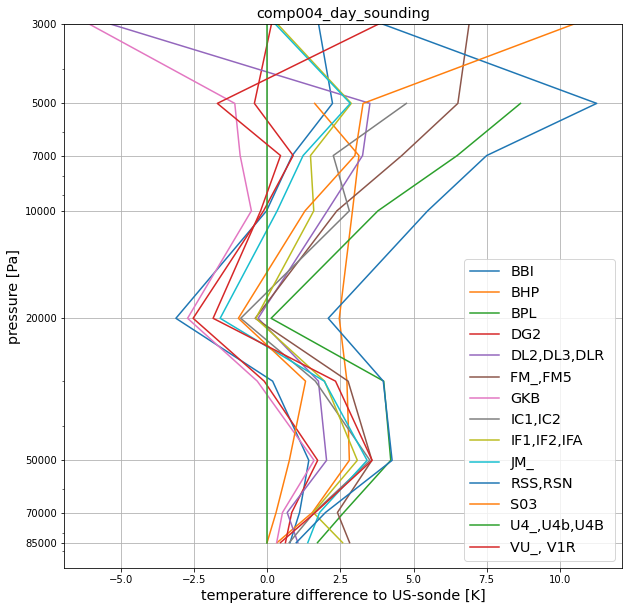

In [14]:
fig, (ax1) = plt.subplots(1)
yplevs = np.array([30,50,70,100,200,500,700,850])*100.
pressure_list = [3000., 5000., 7000., 10000., 20000., 30000., 50000., 70000., 85000.]

#     -
for i in range(len(newmeans)):
    # difference of sondtype mean and us sond mean
    ax1.semilogy((np.array(newmeans[i]) - np.array(newmeans[-2])), pressure_list, label = st[i])
ax1.set(xlabel ='temperature difference to US-sonde [K]', ylabel='pressure [Pa]', title='comp004_day_sounding')
ax1.set_yticks(ticks=yplevs)
ax1.set_yticklabels(map("{:.0f}".format, yplevs),rotation='horizontal')
ax1.set_ylim(100000,3000)
ax1.legend(loc='best')
ax1.grid()
plt.show()

---

In [15]:
x = da_night
sond_all = []
temp_all = []

for i in x.trajectory_label.drop_duplicates():
    temp = []
    xx = x[x['trajectory_label'].str[-3:] == i[-3:]] 
    if('U4_,U4b,U4B ' in np.array(xx.sonde_type.drop_duplicates())):
        for j in xx.sonde_type.drop_duplicates():
            pressure_list = [3000., 5000., 7000., 10000., 20000., 30000., 50000., 70000., 85000.]
            shorten = 0
            xxx = xx[xx.sonde_type == j]
            xxx = xxx.reset_index(drop=True)
            while True:
                try:
                    f = interp1d(xxx.plev, xxx.ta)
                    temp.append(f(pressure_list))
                    sond_all.append(xxx.iloc[0].sonde_type)
                    break
                except:
                    if shorten > 5:
                        break
                    pressure_list[shorten] = np.nan
                    shorten += 1
    # creates mean of all data series in this ascent.
    mean_temp = np.mean(temp, axis=0)
    for k in temp:
        # difference of ascent and ascent mean.
        temp_all.append((k))

In [16]:
# sorting by sondtype
p = np.array(temp_all, dtype='object')
s = np.array(sond_all, dtype='object')
st = np.unique(s)
means = []
for i in range(len(st)):
    add = []
    for j in range(len(p)):
        if(s[j] == st[i]):
            add.append(np.array(p[j], dtype='object'))
    means.append(np.array(add, dtype='object'))
# each element of means is one sondtype array
# st is as long as means and contains the sondtype names
means = np.array(means, dtype='object')

In [17]:
# generating mean values
newmeans = []
for o in means:
    sums = [np.nan]*len(pressure_list)
    for i in range(len(o)):
        for j in range(len(o[i])):
            sums[j] = np.nanmean([sums[j], o[i][j]])
    newmeans.append(np.array(sums))

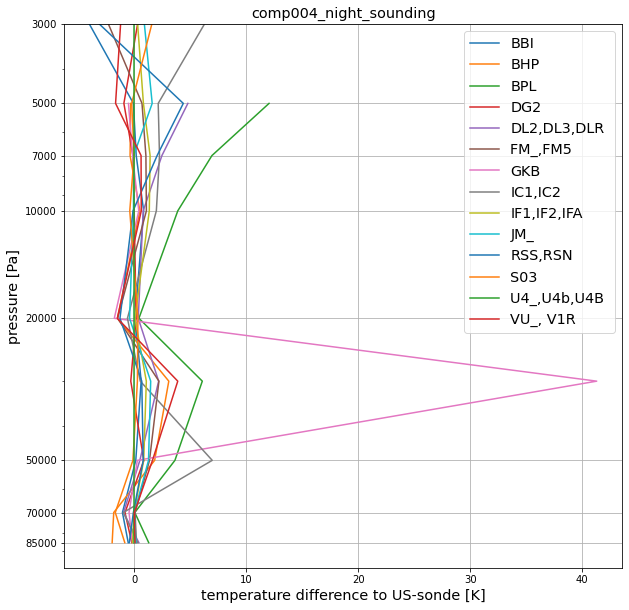

In [18]:
fig, (ax1) = plt.subplots(1)
yplevs = np.array([30,50,70,100,200,500,700,850])*100.
pressure_list = [3000., 5000., 7000., 10000., 20000., 30000., 50000., 70000., 85000.]
#     -
for i in range(len(newmeans)):
    # difference of sondtype mean and us sond mean
    ax1.semilogy((np.array(newmeans[i]) - np.array(newmeans[-2])), pressure_list, label = st[i])
ax1.set(xlabel ='temperature difference to US-sonde [K]', ylabel='pressure [Pa]', title='comp004_night_sounding')
ax1.set_yticks(ticks=yplevs)
ax1.set_yticklabels(map("{:.0f}".format, yplevs),rotation='horizontal')
ax1.set_ylim(100000,3000)
ax1.legend(loc='best')
ax1.grid()
plt.show()

---

## Calculation the systematic differences of each ascent, subtract the corresponding ascent from American sonde, and build means per sondetype.

In [19]:
x = da_day
sond_all = []
temp_all = []

for i in x.trajectory_label.drop_duplicates():
    temp = []
    xx = x[x['trajectory_label'].str[-3:] == i[-3:]] 
    if('U4_,U4b,U4B ' in np.array(xx.sonde_type.drop_duplicates())):
        for j in xx.sonde_type.drop_duplicates():
            pressure_list = [3000., 5000., 7000., 10000., 20000., 30000., 50000., 70000., 85000.]
            shorten = 0
            xxx = xx[xx.sonde_type == j]
            xxx = xxx.reset_index(drop=True)
            while True:
                try:
                    f = interp1d(xxx.plev, xxx.ta)
                    temp.append(f(pressure_list))
                    sond_all.append(xxx.iloc[0].sonde_type)
                    break
                except:
                    if shorten > 5:
                        break
                    pressure_list[shorten] = np.nan
                    shorten += 1
    # creates mean of all data series in this ascent.
    mean_temp = np.mean(temp, axis=0)
    for k in temp:
        # difference of ascent and ascent mean.
        temp_all.append((k-mean_temp))

In [20]:
# sorting by sondtype
p = np.array(temp_all, dtype='object')
s = np.array(sond_all, dtype='object')
st = np.unique(s)
means = []
for i in range(len(st)):
    add = []
    for j in range(len(p)):
        if(s[j] == st[i]):
            add.append(np.array(p[j], dtype='object'))
    means.append(np.array(add, dtype='object'))
# each element of means is one sondtype array
# st is as long as means and contains the sondtype names
means = np.array(means, dtype='object')

In [21]:
# generating mean values
newmeans = []
for o in means:
    sums = [np.nan]*len(pressure_list)
    for i in range(len(o)):
        for j in range(len(o[i])):
            sums[j] = np.nanmean([sums[j], o[i][j]])
    newmeans.append(np.array(sums))

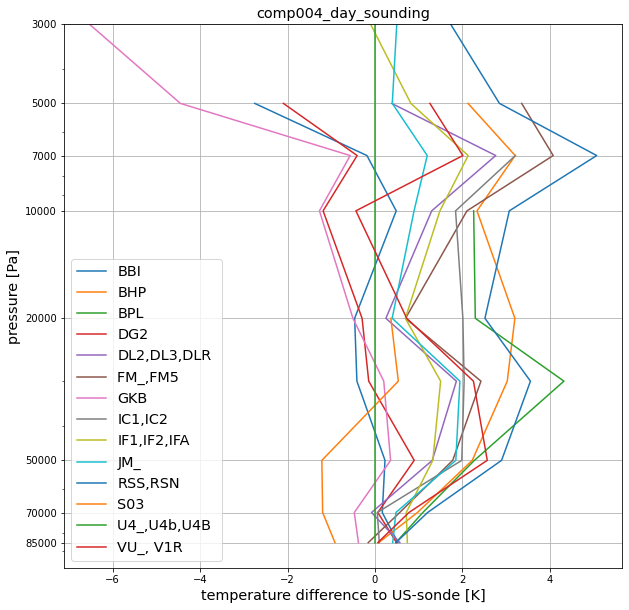

In [22]:
fig, (ax1) = plt.subplots(1)
yplevs = np.array([30,50,70,100,200,500,700,850])*100.
pressure_list = [3000., 5000., 7000., 10000., 20000., 30000., 50000., 70000., 85000.]

#     -
for i in range(len(newmeans)):
    # difference of sondtype mean and us sond mean
    ax1.semilogy((np.array(newmeans[i]) - np.array(newmeans[-2])), pressure_list, label = st[i])
ax1.set(xlabel ='temperature difference to US-sonde [K]', ylabel='pressure [Pa]', title='comp004_day_sounding')
ax1.set_yticks(ticks=yplevs)
ax1.set_yticklabels(map("{:.0f}".format, yplevs),rotation='horizontal')
ax1.set_ylim(100000,3000)
ax1.legend(loc='best')
ax1.grid()
plt.show()

---

In [23]:
x = da_night
sond_all = []
temp_all = []

for i in x.trajectory_label.drop_duplicates():
    temp = []
    xx = x[x['trajectory_label'].str[-3:] == i[-3:]] 
    if('U4_,U4b,U4B ' in np.array(xx.sonde_type.drop_duplicates())):
        for j in xx.sonde_type.drop_duplicates():
            pressure_list = [3000., 5000., 7000., 10000., 20000., 30000., 50000., 70000., 85000.]
            shorten = 0
            xxx = xx[xx.sonde_type == j]
            xxx = xxx.reset_index(drop=True)
            while True:
                try:
                    f = interp1d(xxx.plev, xxx.ta)
                    temp.append(f(pressure_list))
                    sond_all.append(xxx.iloc[0].sonde_type)
                    break
                except:
                    if shorten > 5:
                        break
                    pressure_list[shorten] = np.nan
                    shorten += 1
    # creates mean of all data series in this ascent.
    mean_temp = np.mean(temp, axis=0)
    for k in temp:
        # difference of ascent and ascent mean.
        temp_all.append((k-mean_temp))

In [24]:
# sorting by sondtype
p = np.array(temp_all, dtype='object')
s = np.array(sond_all, dtype='object')
st = np.unique(s)
means = []
for i in range(len(st)):
    add = []
    for j in range(len(p)):
        if(s[j] == st[i]):
            add.append(np.array(p[j], dtype='object'))
    means.append(np.array(add, dtype='object'))
# each element of means is one sondtype array
# st is as long as means and contains the sondtype names
means = np.array(means, dtype='object')

In [25]:
# generating mean values
newmeans = []
for o in means:
    sums = [np.nan]*len(pressure_list)
    for i in range(len(o)):
        for j in range(len(o[i])):
            sums[j] = np.nanmean([sums[j], o[i][j]])
    newmeans.append(np.array(sums))

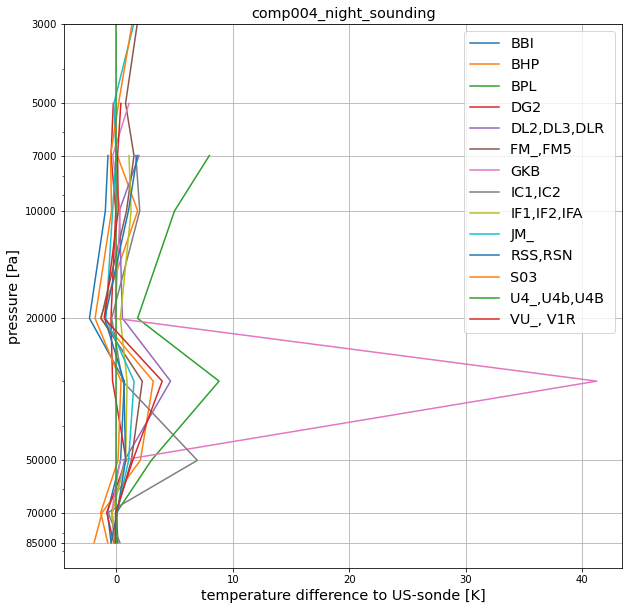

In [26]:
fig, (ax1) = plt.subplots(1)
yplevs = np.array([30,50,70,100,200,500,700,850])*100.
pressure_list = [3000., 5000., 7000., 10000., 20000., 30000., 50000., 70000., 85000.]

#     -
for i in range(len(newmeans)):
    # difference of sondtype mean and us sond mean
    ax1.semilogy((newmeans[i] - newmeans[-2]), pressure_list, label = st[i])
ax1.set(xlabel ='temperature difference to US-sonde [K]', ylabel='pressure [Pa]', title='comp004_night_sounding')
ax1.set_yticks(ticks=yplevs)
ax1.set_yticklabels(map("{:.0f}".format, yplevs),rotation='horizontal')
ax1.set_ylim(100000,3000)
ax1.legend(loc='best')
ax1.grid()
plt.show()